In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np

Funcões auxiliares

In [ ]:
from math import pi,cos,sin

### Setting printing options
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
np.set_printoptions(precision=3,suppress=True)

def move (dx,dy,dz):
    T = np.eye(4)
    T[0,-1] = dx
    T[1,-1] = dy
    T[2,-1] = dz
    return T



def z_rotation(angle):
    rotation_matrix=np.array([[cos(angle),-sin(angle),0,0],[sin(angle),cos(angle),0,0],[0,0,1,0],[0,0,0,1]])
    return rotation_matrix

def x_rotation(angle):
    rotation_matrix=np.array([[1,0,0,0],[0, cos(angle),-sin(angle),0],[0, sin(angle), cos(angle),0],[0,0,0,1]])
    return rotation_matrix

def y_rotation(angle):
    rotation_matrix=np.array([[cos(angle),0, sin(angle),0],[0,1,0,0],[-sin(angle), 0, cos(angle),0],[0,0,0,1]])
    return rotation_matrix


def set_plot(ax=None,figure = None,lim=[-2,2]):
    if figure ==None:
        figure = plt.figure(figsize=(8,8))
    if ax==None:
        ax = plt.axes(projection='3d')

    ax.set_title("camera referecnce")
    ax.set_xlim(lim)
    ax.set_xlabel("x axis")
    ax.set_ylim(lim)
    ax.set_ylabel("y axis")
    ax.set_zlim(lim)
    ax.set_zlabel("z axis")
    return ax

#adding quivers to the plot
def draw_arrows(point,base,axis,length=1.5):
    # The object base is a matrix, where each column represents the vector
    # of one of the axis, written in homogeneous coordinates (ax,ay,az,0)


    # Plot vector of x-axis
    axis.quiver(point[0],point[1],point[2],base[0,0],base[1,0],base[2,0],color='red',pivot='tail',  length=length)
    # Plot vector of y-axis
    axis.quiver(point[0],point[1],point[2],base[0,1],base[1,1],base[2,1],color='green',pivot='tail',  length=length)
    # Plot vector of z-axis
    axis.quiver(point[0],point[1],point[2],base[0,2],base[1,2],base[2,2],color='blue',pivot='tail',  length=length)

    return axis



Criação da câmera e referencial do mundo

Considere uma câmera representada pelos eixos coordenados abaixo. Note que a câmera está alinhada com o referencial do mundo e o eixo Z, o qual representa o eixo óptico da câmera, está apontado para cima.

In [ ]:
# base vector values
e1 = np.array([[1],[0],[0],[0]]) # X
e2 = np.array([[0],[1],[0],[0]]) # Y
e3 = np.array([[0],[0],[1],[0]]) # Z
base = np.hstack((e1,e2,e3))

print ('Cartesian base: \n',base)
#origin point
point =np.array([[0],[0],[0],[1]])

cam = np.hstack((base,point))

print ('Origin: \n',point)

print ('cam: \n',cam)

Cartesian base: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]
Origin: 
 [[0]
 [0]
 [0]
 [1]]
cam: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]


<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

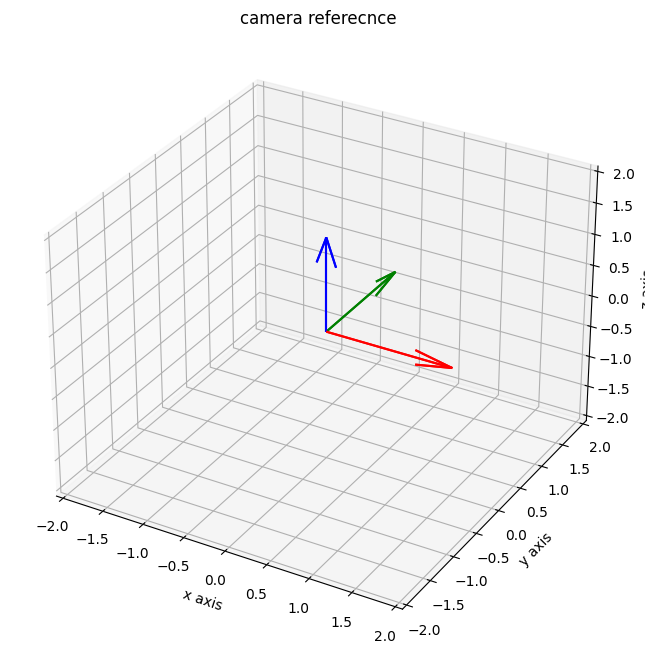

In [ ]:
ax0 = set_plot()
draw_arrows(point,base,ax0)
draw_arrows(cam[:,-1],cam[:,0:3],ax0)

Agora vamos incluir um objeto na cena. Vamos usar a casa que já apresentamos no material das aulas de python.

<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

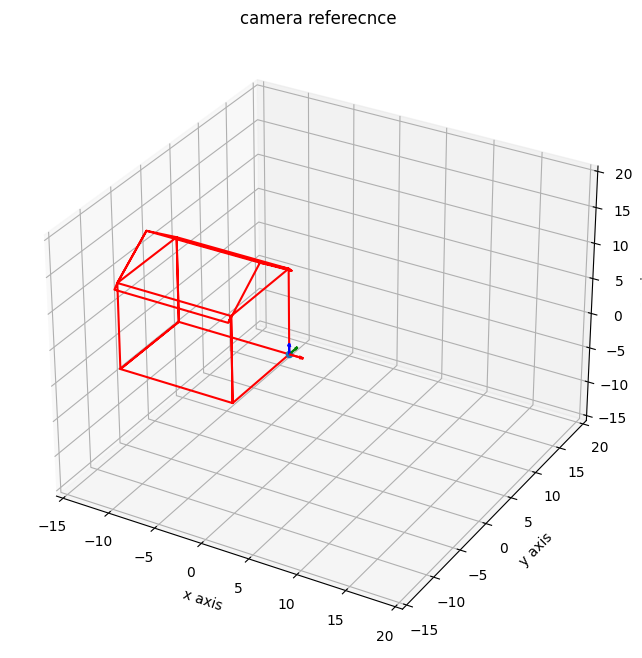

In [ ]:
#Creating a house

house = np.array([[0,         0,         0],
         [0,  -10.0000,         0],
         [0, -10.0000,   12.0000],
         [0,  -10.4000,   11.5000],
         [0,   -5.0000,   16.0000],
         [0,         0,   12.0000],
         [0,    0.5000,   11.4000],
         [0,         0,   12.0000],
         [0,         0,         0],
  [-12.0000,         0,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,  -10.0000,         0],
         [0,  -10.0000,         0],
         [0,  -10.0000,   12.0000],
[-12.0000,  -10.0000,   12.0000],
  [-12.0000,         0,   12.0000],
         [0,         0,   12.0000],
         [0,  -10.0000,   12.0000],
         [0,  -10.5000,   11.4000],
  [-12.0000,  -10.5000,   11.4000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
         [0,   -5.0000,   16.0000],
         [0,    0.5000,   11.4000],
  [-12.0000,    0.5000,   11.4000],
  [-12.0000,         0,   12.0000],
  [-12.0000,   -5.0000,   16.0000],
  [-12.0000,  -10.0000,   12.0000],
  [-12.0000,  -10.0000,         0],
  [-12.0000,   -5.0000,         0],
  [-12.0000,         0,         0],
  [-12.0000,         0,   12.0000],
  [-12.0000,         0,         0]])

house = np.transpose(house)

#add a vector of ones to the house matrix to represent the house in homogeneous coordinates
house = np.vstack([house, np.ones(np.size(house,1))])

ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plote a câmera também - adicione o código abaixo

draw_arrows(cam[:,-1],cam[:,0:3],ax0)


Vamos posicionar a câmera com o eixo Z apontando para a casa e a uma distância de 10 unidades da casa.

Tomando o sistema de coordenadas do mundo como referencial, vamos transformar o objeto câmera da seguinte forma:

1- Rotacionar a câmera de -90 graus em torno do eixo X

2- Rotacionar a câmera de 90 graus em torno do eixo Z

3- Transladar a câmera para posicioná-la no ponto (15,-5,6).

cam_0: 
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
cam: 
 [[ 0. -0. -1. 15.]
 [ 1.  0.  0. -5.]
 [ 0. -1.  0.  6.]
 [ 0.  0.  0.  1.]]


<Axes3D: title={'center': 'camera referecnce'}, xlabel='x axis', ylabel='y axis', zlabel='z axis'>

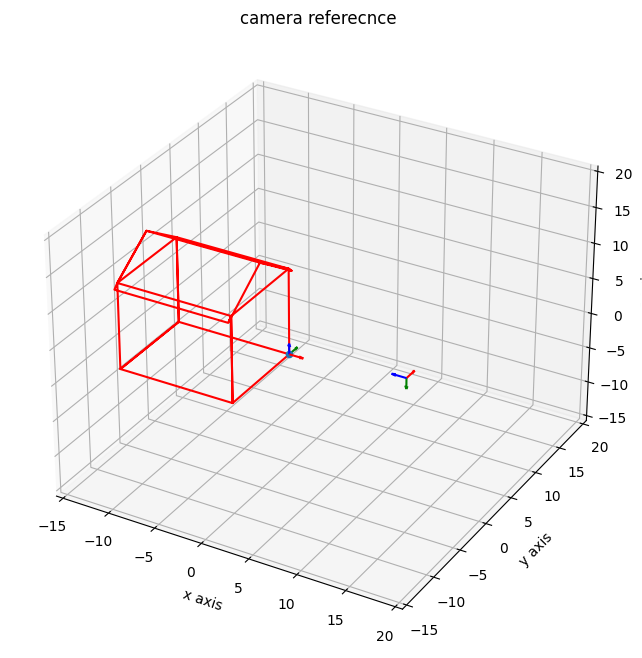

In [ ]:
cam_0 = cam

Rx = x_rotation(-pi/2)
Rz = z_rotation(pi/2)
T = move(15,-5,6)
M = np.dot(np.dot(T,Rz),Rx)
cam  = np.dot(M,cam)

print ('cam_0: \n',cam_0)
print ('cam: \n',cam)

ax0 = set_plot(lim=[-15,20])
draw_arrows(point,base,ax0)
ax0.plot3D(house[0,:], house[1,:], house[2,:], 'red')
# Plotando a quina da casa que está em (0,0,0) para servir de referência
ax0.scatter(house[0,0], house[1,0], house[2,0],'b')
# Plote a câmera também - adicione o código abaixo

draw_arrows(cam[:,-1],cam[:,0:3],ax0)

Considere agora que a câmera tem como parâmetros intrínsecos:

1- Distância focal igual a 50mm

2- CCD de tamanho 36 x 24 mm que gera uma imagem de 1280 x 720 pixels

3- Sem cisalhamento

Construa a matriz de parâmetros intrínsecos.
Faça seu código abaixo.

Baseado nas rotações e translação feitas para posicionamento da câmera, defina a matriz de parâmetros extrínsecos.

Faça o código aqui.

Agora que você já possui as matrizes de parâmetros instrínsecos e extrínsecos, defina a matriz completa de projeção perspectiva.

Depois use essa matriz para projetar a casa no plano da imagem. Você fará isso realizando os seguintes passos:

1- Multiplique a matriz de projeção pelo objeto a ser projetado. Este objeto deve estar representado em coordenadas homogêneas, no formato de uma matriz, onde cada ponto do objeto está representado em uma coluna.

2- Depois de projetado, os pontos do objeto estarão na forma (kx, ky, k). Então para obter as coordenadas cartesianas de cada ponto projetado, você deverá realizar a divisão das suas duas primeiras coordenadas pela terceira para obter (x,y,1).

3- Gere a imagem 2D, plotando os pontos projetados.

4- Fique atento para o fato de que a origem da imagem está no canto superior esquerdo e que o eixo X e eixo Y aumentam da esquerda para a direita e de cima para baixo, respectivamente.

Se achar mais interessante, monte uma função para realizar a projeção.

Faça seu código abaixo. Há algumas dicas para te ajudar.

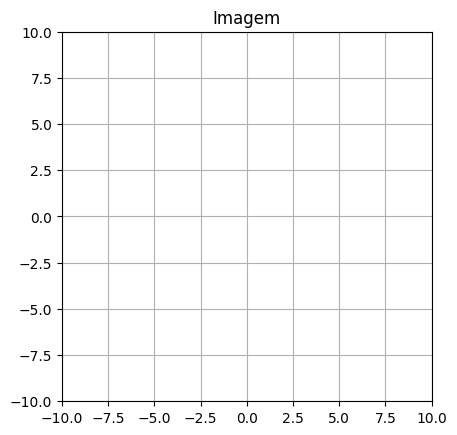

In [ ]:
# Matriz de projeção


# Projeção e criação da imagem


# Preparação das coordenadas na forma cartesiana


# Plota a imagem

fig = plt.figure()
ax1 = plt.axes()
ax1.set_title("Imagem")
# Acerte os limites do eixo X
ax1.set_xlim([-10,10])
# Acerte os limites do eixo Y
# Para inverter, basta colocar o valor máximo primeiro e o valor mínimo depois
ax1.set_ylim([-10,10])
ax1.plot(3,4)
ax1.grid('True')
ax1.set_aspect('equal')

plt.show()

